In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('../Data/data_cleaned.csv')
df.head(2)

,Unnamed: 0,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.0
1,1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.0


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.dtypes

country                                            object
region                                             object
year                                                int64
happiness_score                                   float64
economy_(gdp_per_capita)                          float64
family                                            float64
health_(life_expectancy)                          float64
freedom                                           float64
trust_(government_corruption)                     float64
generosity                                        float64
dystopia_residual                                 float64
food_supply_(kcal/capita/day)                     float64
crude_birth_rate_(births_per_1,000_population)    float64
deaths_-_unsafe_water_source_per_100k_people      float64
deaths_-_conflict_and_terrorism                   float64
dtype: object

In [5]:
features = ['year', 'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)', 
            'freedom', 'trust_(government_corruption)', 'generosity', 'dystopia_residual', 
            'food_supply_(kcal/capita/day)', 'crude_birth_rate_(births_per_1,000_population)', 
           'deaths_-_unsafe_water_source_per_100k_people', 'deaths_-_conflict_and_terrorism']

In [6]:
X = df[features]
y = df['happiness_score']

In [7]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
# Create X_poly
X_poly = poly.transform(X)
X_poly

array([[2.01500000e+03, 1.39651000e+00, 1.34951000e+00, ...,
        9.09347787e-04, 0.00000000e+00, 0.00000000e+00],
       [2.01500000e+03, 1.30232000e+00, 1.40223000e+00, ...,
        4.53702482e-04, 0.00000000e+00, 0.00000000e+00],
       [2.01500000e+03, 1.32548000e+00, 1.36058000e+00, ...,
        5.11451980e-03, 2.52364419e-03, 1.24523518e-03],
       ...,
       [2.01700000e+03, 5.11135876e-01, 1.04198980e+00, ...,
        1.67796819e+03, 3.26349282e+00, 6.34719147e-03],
       [2.01700000e+03, 7.77153134e-01, 3.96102607e-01, ...,
        5.13788301e-02, 5.17295652e+01, 5.20826946e+04],
       [2.01700000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        2.25926389e+04, 6.10988891e+03, 1.65234095e+03]])

In [9]:
poly.get_feature_names(X.columns)

['year',
 'economy_(gdp_per_capita)',
 'family',
 'health_(life_expectancy)',
 'freedom',
 'trust_(government_corruption)',
 'generosity',
 'dystopia_residual',
 'food_supply_(kcal/capita/day)',
 'crude_birth_rate_(births_per_1,000_population)',
 'deaths_-_unsafe_water_source_per_100k_people',
 'deaths_-_conflict_and_terrorism',
 'year^2',
 'year economy_(gdp_per_capita)',
 'year family',
 'year health_(life_expectancy)',
 'year freedom',
 'year trust_(government_corruption)',
 'year generosity',
 'year dystopia_residual',
 'year food_supply_(kcal/capita/day)',
 'year crude_birth_rate_(births_per_1,000_population)',
 'year deaths_-_unsafe_water_source_per_100k_people',
 'year deaths_-_conflict_and_terrorism',
 'economy_(gdp_per_capita)^2',
 'economy_(gdp_per_capita) family',
 'economy_(gdp_per_capita) health_(life_expectancy)',
 'economy_(gdp_per_capita) freedom',
 'economy_(gdp_per_capita) trust_(government_corruption)',
 'economy_(gdp_per_capita) generosity',
 'economy_(gdp_per_capit

In [10]:
# View X_poly in a DataFrame
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
poly_df

,year,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",...,food_supply_(kcal/capita/day)^2,"food_supply_(kcal/capita/day) crude_birth_rate_(births_per_1,000_population)",food_supply_(kcal/capita/day) deaths_-_unsafe_water_source_per_100k_people,food_supply_(kcal/capita/day) deaths_-_conflict_and_terrorism,"crude_birth_rate_(births_per_1,000_population)^2","crude_birth_rate_(births_per_1,000_population) deaths_-_unsafe_water_source_per_100k_people","crude_birth_rate_(births_per_1,000_population) deaths_-_conflict_and_terrorism",deaths_-_unsafe_water_source_per_100k_people^2,deaths_-_unsafe_water_source_per_100k_people deaths_-_conflict_and_terrorism,deaths_-_conflict_and_terrorism^2
0,2015.0,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,3460.000000,10.364,...,1.197160e+07,35859.440000,104.337663,0.000000,107.412496,0.312531,0.000000,0.000909,0.000000,0.000000
1,2015.0,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,3548.000000,12.933,...,1.258830e+07,45886.284000,75.573440,0.000000,167.262489,0.275477,0.000000,0.000454,0.000000,0.000000
2,2015.0,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,3315.000000,10.411,...,1.098922e+07,34512.465000,237.075112,116.979355,108.388921,0.744552,0.367382,0.005115,0.002524,0.001245
3,2015.0,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,3435.000000,11.397,...,1.179922e+07,39148.695000,224.562651,0.000000,129.891609,0.745077,0.000000,0.004274,0.000000,0.000000
4,2015.0,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,3438.000000,10.710,...,1.181984e+07,36820.980000,233.939662,0.000000,114.704100,0.728765,0.000000,0.004630,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2017.0,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2215.000000,32.062,...,4.906225e+06,71017.330000,89938.284527,70.574146,1027.971844,1301.851593,1.021557,1648.700380,1.293727,0.001015
466,2016.0,0.747190,0.148660,0.629940,0.069120,0.172330,0.483970,0.817890,3136.093023,24.525,...,9.835079e+06,76912.681395,721.336946,967201.307764,601.475625,5.641028,7563.746323,0.052905,70.937712,95116.503578
467,2017.0,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2396.000000,37.075,...,5.740816e+06,88831.700000,98147.372104,190.887554,1374.555625,1518.703598,2.953738,1677.968193,3.263493,0.006347
468,2017.0,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,3136.093023,24.115,...,9.835079e+06,75626.883256,710.855032,715707.649401,581.533225,5.466123,5503.436868,0.051379,51.729565,52082.694602


In [11]:
lr = LinearRegression()

In [12]:
cross_val_score(lr, X_poly, y).mean()

0.9999724812997284

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 42)

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9999999495508695, 0.9999988695435212)

In [16]:
lr.coef_

array([ 1.24230519e-01,  7.55931563e-01,  1.19283149e+00,  1.03517465e+00,
        3.13702315e-01,  9.75377419e-01,  1.21916205e+00,  1.06363749e+00,
       -7.58500663e-05, -2.01120595e-02,  1.94635310e-03,  2.15833641e-02,
       -3.09034241e-05,  1.20512006e-04, -9.47939128e-05, -1.72671159e-05,
        3.38593307e-04,  1.23802567e-05, -1.07475163e-04, -3.15634233e-05,
        3.73831334e-08,  9.98177515e-06, -9.64580802e-07, -1.07232621e-05,
       -4.15081928e-05,  3.99639846e-04, -2.44514607e-04,  1.32418405e-03,
       -8.71736288e-04,  1.38895142e-03,  8.29556711e-05,  2.05153036e-07,
       -4.19598199e-05,  1.99953699e-05,  2.08825435e-06, -4.46440711e-04,
       -2.93006754e-04,  6.45017080e-04, -2.31440147e-04, -1.94943823e-03,
        7.65249671e-05, -2.54753331e-07, -8.18726800e-06, -4.32600497e-06,
       -1.83690142e-05, -1.53372318e-03, -1.97900480e-03,  2.74017098e-03,
        1.48532738e-04, -3.28903443e-04,  1.29566424e-06, -4.43713056e-05,
        6.66879051e-07,  

In [17]:
poly_coefs = pd.Series(lr.coef_, index=poly_df.columns)

In [18]:
import matplotlib.pyplot as plt

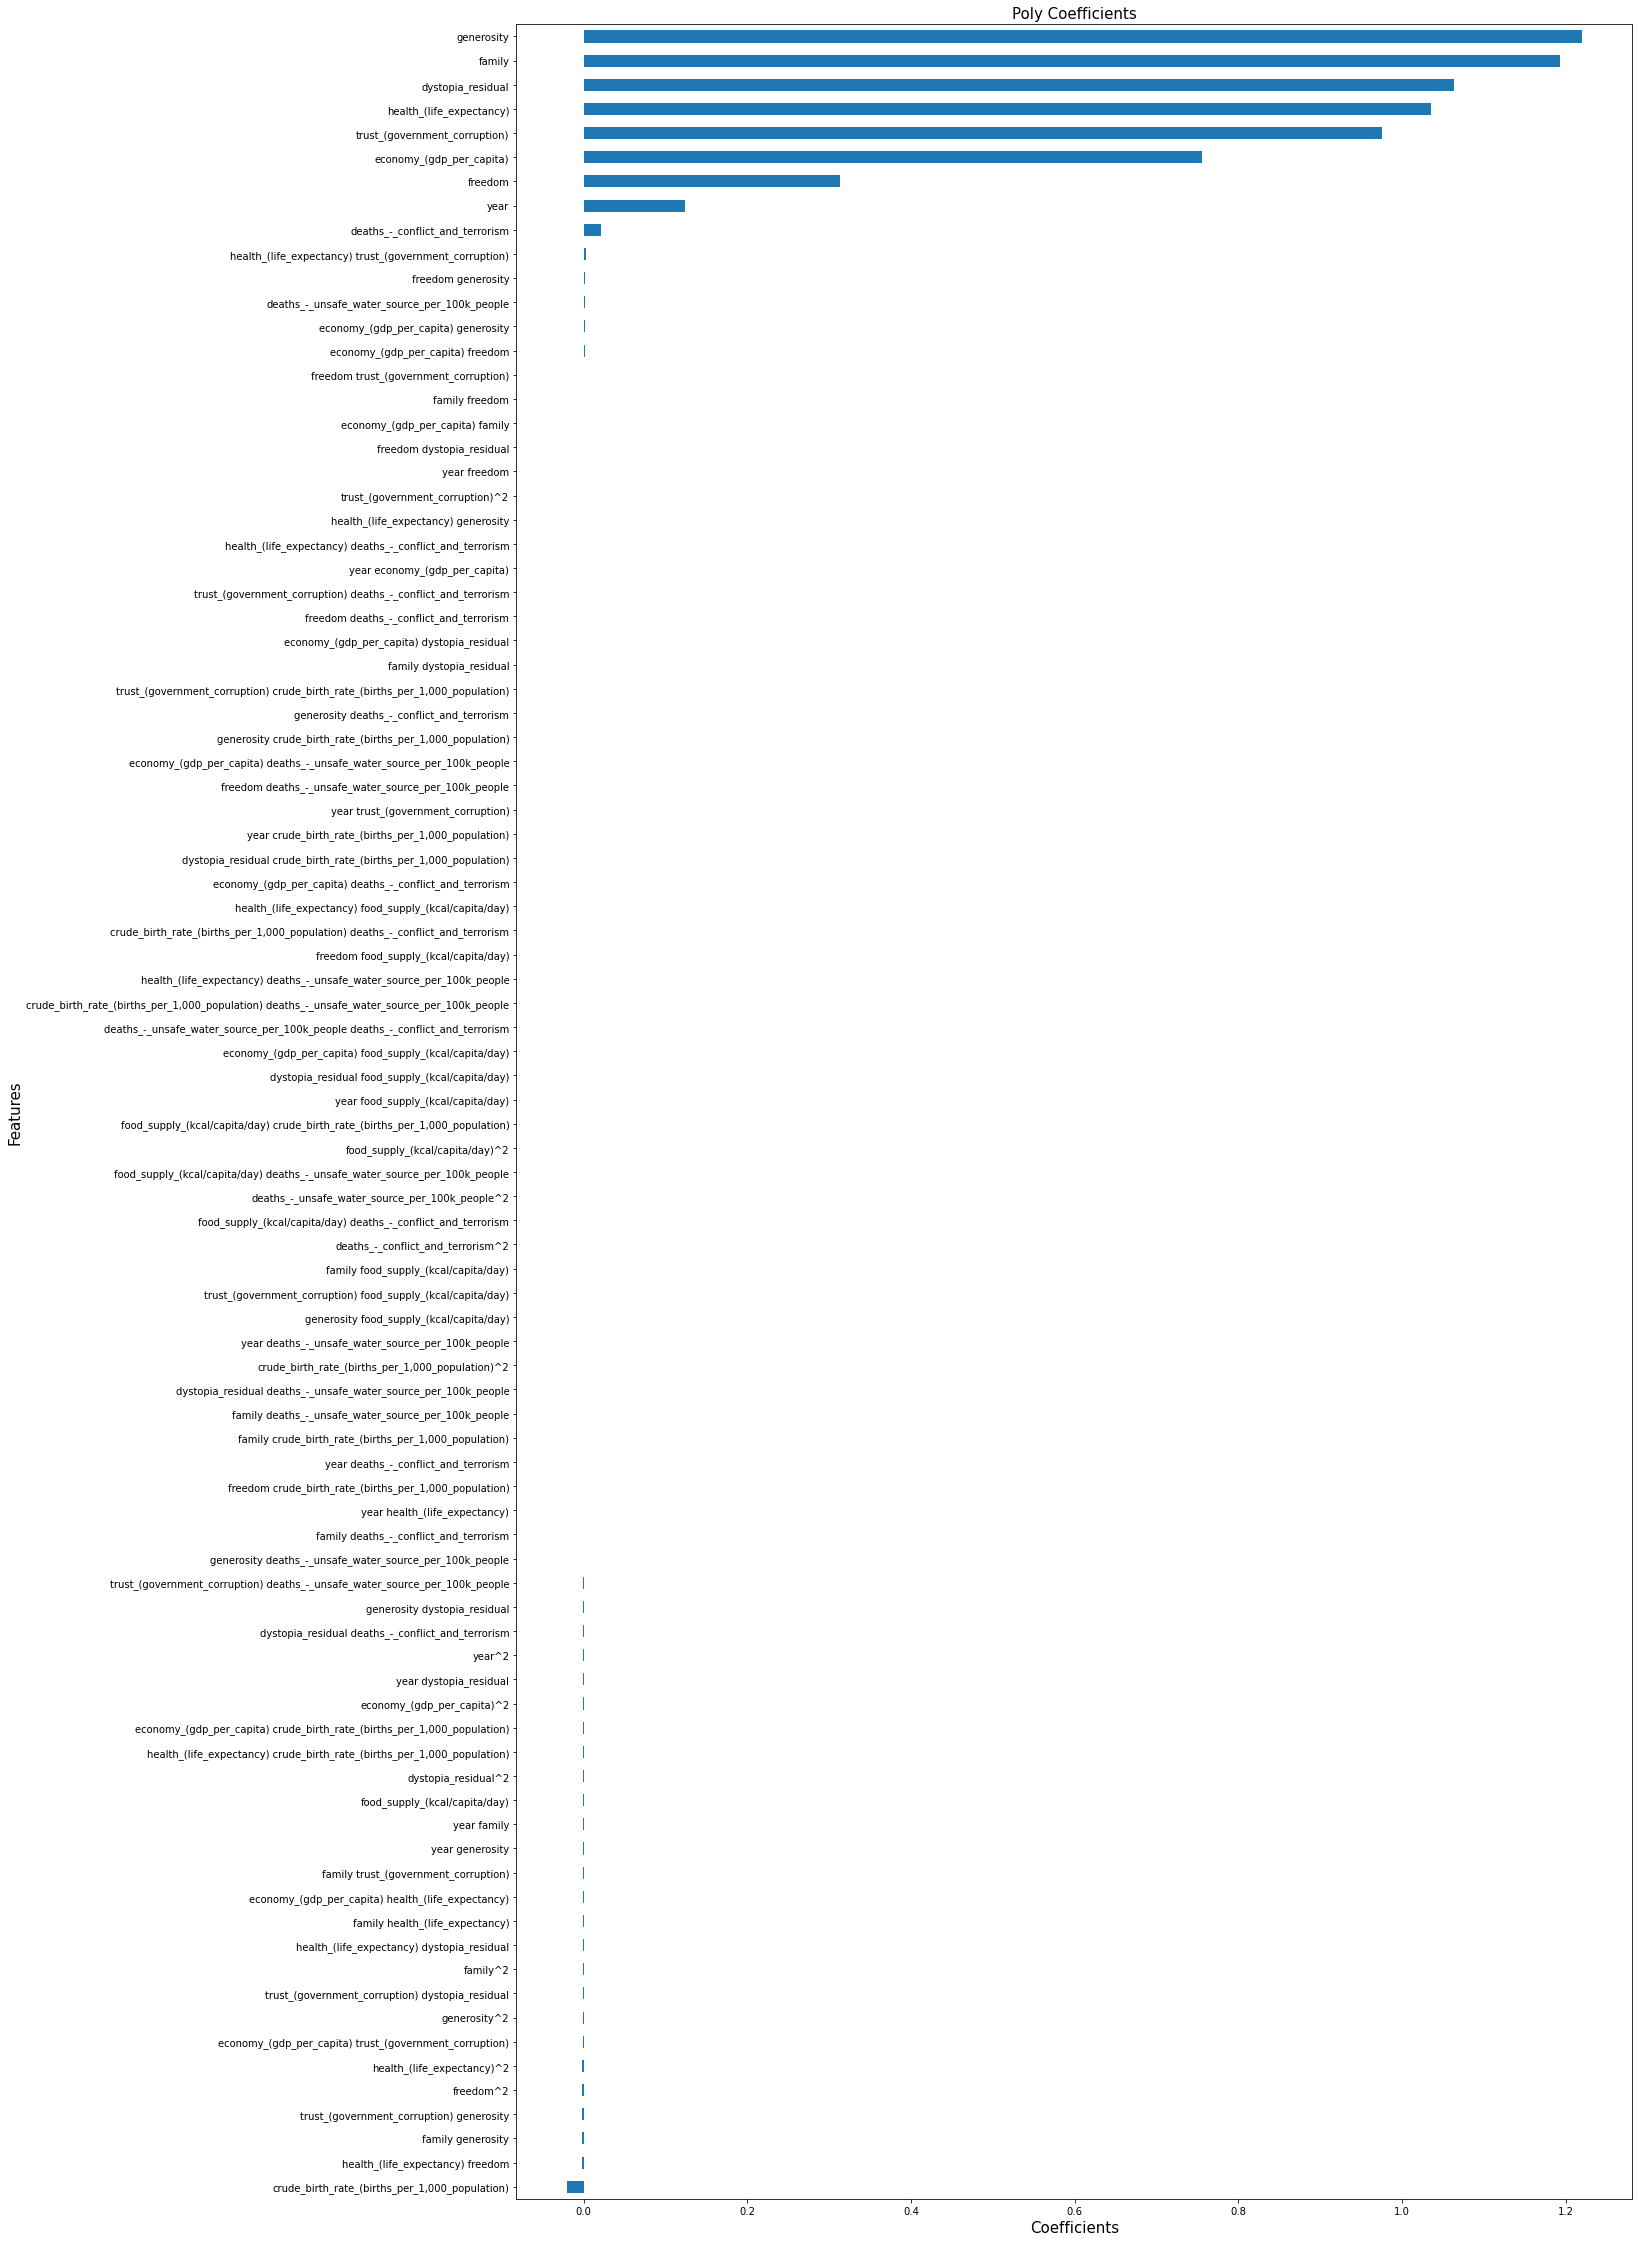

In [19]:
plt.figure(figsize=(20, 40))
poly_coefs[poly_coefs != 0].sort_values().plot.barh()
plt.title('Poly Coefficients', size=15)
plt.xlabel('Coefficients', size=15)
plt.ylabel('Features', size=15);

In [20]:
from sklearn.linear_model import Lasso, LassoCV

In [21]:
l_alphas = np.logspace(-3, 300, 1000)
lasso = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

In [22]:
lasso.fit(X_poly, y)

LassoCV(alphas=array([1.00000000e-003, 2.01049642e-003, 4.04209584e-003, 8.12661920e-003,
       1.63385388e-002, 3.28485737e-002, 6.60419396e-002, 1.32777083e-001,
       2.66947849e-001, 5.36697695e-001, 1.07902879e+000, 2.16938352e+000,
       4.36153779e+000, 8.76885609e+000, 1.76297538e+001, 3.54445567e+001,
       7.12611543e+001, 1.43270295e+002, 2.88044415e+002, 5.79112265e+002,
       1.164303...
       1.05687597e+293, 2.12484535e+293, 4.27199397e+293, 8.58882856e+293,
       1.72678090e+294, 3.47168682e+294, 6.97981391e+294, 1.40328908e+295,
       2.82130768e+295, 5.67222897e+295, 1.14039960e+296, 2.29276931e+296,
       4.60960449e+296, 9.26759330e+296, 1.86324631e+297, 3.74605003e+297,
       7.53142017e+297, 1.51418933e+298, 3.04427221e+298, 6.12049837e+298,
       1.23052400e+299, 2.47396410e+299, 4.97389596e+299, 1.00000000e+300]),
        cv=5, max_iter=10000)

In [23]:
lasso.alpha_

0.016338538778098613

In [24]:
lasso.score(X_poly, y)

0.9999952158037182

In [25]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.43276743e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.90235952e-09,  5.02572535e-04,  4.95467867e-04,  4.27508768e-04,
        4.93830421e-04,  4.73028925e-04,  4.94282404e-04,  4.91426216e-04,
       -7.41940583e-07, -9.92150618e-07, -1.35749393e-07, -2.17710214e-07,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.39553868e-06,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.89645877e-05,  0.00000000e+00,
        0.00000000e+00,  

In [26]:
lasso_coefs = pd.Series(lasso.coef_, index=poly_df.columns)

In [27]:
len(lasso_coefs)

90

In [28]:
len(lasso_coefs[lasso_coefs != 0])

26

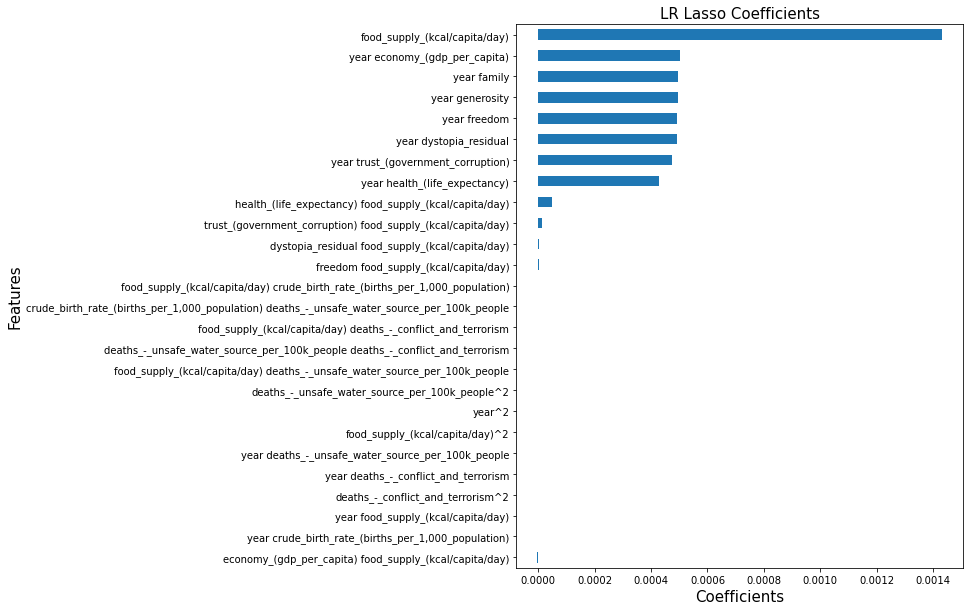

In [29]:
plt.figure(figsize=(8, 10))
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh()
plt.title('LR Lasso Coefficients', size=15)
plt.xlabel('Coefficients', size=15)
plt.ylabel('Features', size=15)
plt.savefig('../visuals/lasso_coefficients.png');